In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sys
import os

# Add the 'src' directory to the Python path
sys.path.append(os.path.abspath(r'C:\Users\xelor\Downloads\E2E ML project\src'))

# Now you should be able to import from 'src'
from preprocess import identify_tweet_language, preprocess, normalize_arabizi


In [17]:
df = pd.read_csv(r'C:\Users\xelor\Downloads\E2E ML project\scrapped_data\scrapped_comments.csv')
df

,comments,polarity
0,عواشر مبروكه خويا العزيز والدخل عليك بالصحه وا...,NaN
1,Khoya marhba hawl tzid kaliti video lah iwaf9,NaN
2,خوة الله يرحم ليكم لوالدين لما شجعوني بشي ابون...,NaN
3,الله يسعد مساءك بالهنا والراحة وبصحة الله يفرحك,NaN
4,هاد الحاولي ميت من شحال هاديبقاو غي تصاور ديال...,NaN
5,7awli ma fham walo,NaN
6,تلعب اولدي شحال من واحد قاتلووو المطور فوق الحولي,NaN
7,Khoya marehaba bghibake tareja3e kifema lawale...,NaN
8,An lwale,NaN
9,بسم الله الرحمن الرحيم ماشاء الله تبارك الله ل...,NaN


In [18]:
df.info

<bound method DataFrame.info of                                              comments  polarity
0   عواشر مبروكه خويا العزيز والدخل عليك بالصحه وا...       NaN
1       Khoya marhba hawl tzid kaliti video lah iwaf9       NaN
2   خوة الله يرحم ليكم لوالدين لما شجعوني بشي ابون...       NaN
3     الله يسعد مساءك بالهنا والراحة وبصحة الله يفرحك       NaN
4   هاد الحاولي ميت من شحال هاديبقاو غي تصاور ديال...       NaN
5                                 7awli ma fham walo        NaN
6   تلعب اولدي شحال من واحد قاتلووو المطور فوق الحولي       NaN
7   Khoya marehaba bghibake tareja3e kifema lawale...       NaN
8                                           An lwale        NaN
9   بسم الله الرحمن الرحيم ماشاء الله تبارك الله ل...       NaN
10         تحاتي خويا مرحبا رجع لمغامرات ديما كتفرجنا       NaN
11                                          وامي كرشي       NaN
12  شحال من واحد كيشوف هاد تعليق بعت تشوف ممتك في ...       NaN
13                                            ml3ouba       NaN
14      

In [22]:
df["comments"].isna().sum()

1

In [23]:
df = df.dropna(subset=['comments'])

In [24]:
df["comments"].isna().sum()

0

In [26]:
# Identify the language of each comment
df = identify_tweet_language(df, src_field='comments')
df.head()

,comments,polarity,language
0,عواشر مبروكه خويا العزيز والدخل عليك بالصحه وا...,NaN,Arabic
1,Khoya marhba hawl tzid kaliti video lah iwaf9,NaN,Arabizi
2,خوة الله يرحم ليكم لوالدين لما شجعوني بشي ابون...,NaN,Arabic
3,الله يسعد مساءك بالهنا والراحة وبصحة الله يفرحك,NaN,Arabic
4,هاد الحاولي ميت من شحال هاديبقاو غي تصاور ديال...,NaN,Arabic


In [36]:
language_counts = df["language"].value_counts()
language_counts

language
Arabic     14
Arabizi     8
Name: count, dtype: int64

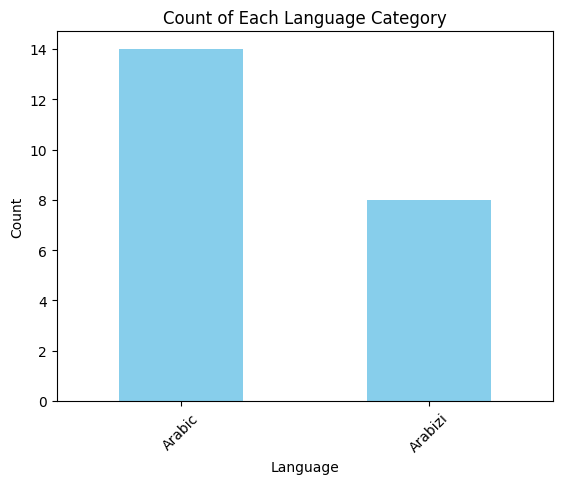

In [37]:
# Create a bar plot for language counts
language_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Each Language Category')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()